In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [5]:


# Veri dizinleri ve parametreler
train_dir = "./Train"
test_dir = "./Test"

img_width, img_height = 128, 128
batch_size = 32
num_classes = 5
epochs = 50

# Veri artırımı
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Confusion matrix için shuffle kapalı
)

# Önceden eğitilmiş MobileNetV2 modeli yükleme
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Modelin transfer learning için sabitlenmesi
base_model.trainable = False

# Transfer Learning modeli oluşturma
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.summary()

# Modeli derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model kontrol noktası
checkpoint = ModelCheckpoint("model2.1_transfer.sugarcane.keras", monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Model eğitimi
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=[checkpoint]
)


Found 2411 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,205 (9.87 MB)

 Trainable params: 329,221 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

c:\Users\azizd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 601ms/step - accuracy: 0.4038 - loss: 1.7033
Epoch 1: val_loss improved from inf to 1.00760, saving model to model2.1_transfer.sugarcane.keras
76/76 ━━━━━━━━━━━━━━━━━━━━ 58s 659ms/step - accuracy: 0.4052 - loss: 1.6980 - val_accuracy: 0.5600 - val_loss: 1.0076
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.6553 - loss: 0.9043
Epoch 2: val_loss improved from 1.00760 to 0.84995, saving model to model2.1_transfer.sugarcane.keras
76/76 ━━━━━━━━━━━━━━━━━━━━ 43s 559ms/step - accuracy: 0.6554 - loss: 0.9037 - val_accuracy: 0.7600 - val_loss: 0.8499
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.6953 - loss: 0.7969
Epoch 3: val_loss improved from 0.84995 to 0.81262, saving model to model2.1_transfer.sugarcane.keras
76/76 ━━━━━━━━━━━━━━━━━━━━ 43s 568ms/step - accuracy: 0.6951 - loss: 0.7971 - val_accuracy: 0.7200 - val_loss: 0.8126
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.7349 - loss: 0.7143


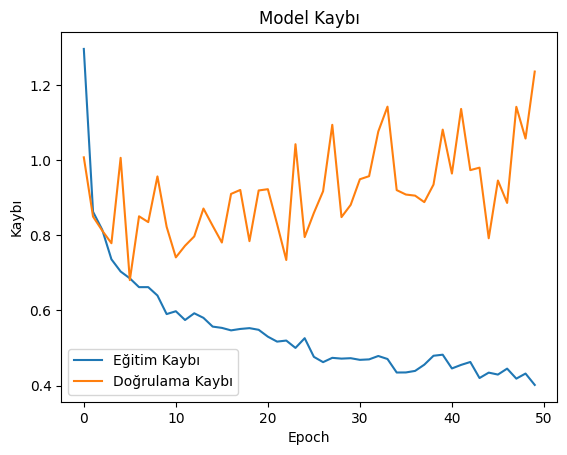

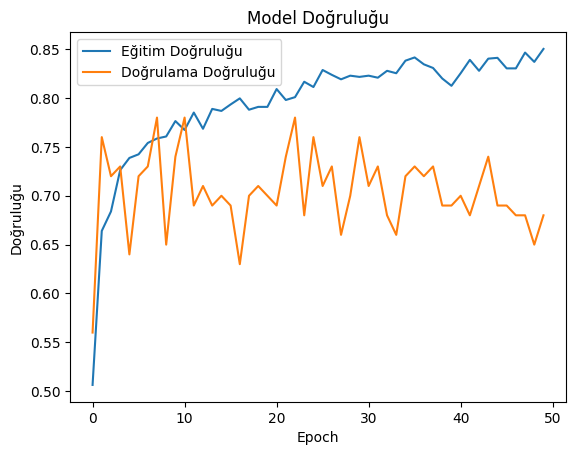

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step
Karışıklık Matrisi
[[12  0  1  7  0]
 [ 2 11  1  5  1]
 [ 0  0 13  5  2]
 [ 0  0  1 18  1]
 [ 3  0  2  1 14]]
Sınıflandırma Raporu
              precision    recall  f1-score   support

     Healthy       0.71      0.60      0.65        20
      Mosaic       1.00      0.55      0.71        20
      RedRot       0.72      0.65      0.68        20
        Rust       0.50      0.90      0.64        20
      Yellow       0.78      0.70      0.74        20

    accuracy                           0.68       100
   macro avg       0.74      0.68      0.68       100
weighted avg       0.74      0.68      0.68       100



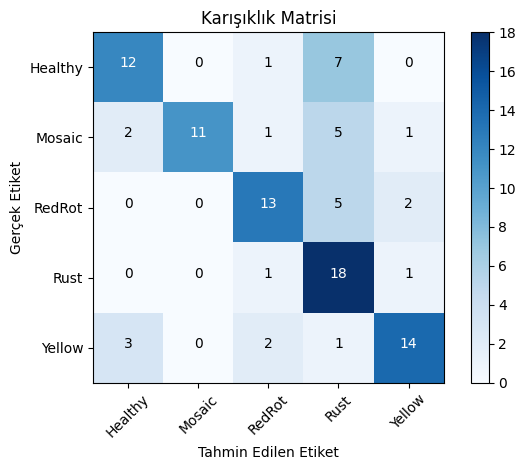

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import numpy as np

# Eğitim ve doğrulama kaybı grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluğu grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluğu')
plt.legend()
plt.show()

# Tahminleri al
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Karışıklık matrisi oluşturma
cm = confusion_matrix(test_generator.classes, y_pred)
print('Karışıklık Matrisi')
print(cm)

# Sınıflandırma raporu
target_names = list(test_generator.class_indices.keys())
report = classification_report(test_generator.classes, y_pred, target_names=target_names)
print('Sınıflandırma Raporu')
print(report)

# Karışıklık matrisi görselleştirme
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Karışıklık Matrisi')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.tight_layout()
plt.show()
